In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-10-22 10:10:50.008375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Data Ingestion**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sensor = pd.read_csv("../data/01_raw/sensor.csv")
df_sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

# **Data Cleaning**

In [5]:
df_sensor.drop(columns="Unnamed: 0", inplace=True)

In [6]:
df_sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:
df_sensor["timestamp"] = pd.to_datetime(df_sensor["timestamp"])

In [8]:
df_sensor.drop(columns="sensor_15", inplace=True)

In [9]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   sensor_00       210112 non-null  float64       
 2   sensor_01       219951 non-null  float64       
 3   sensor_02       220301 non-null  float64       
 4   sensor_03       220301 non-null  float64       
 5   sensor_04       220301 non-null  float64       
 6   sensor_05       220301 non-null  float64       
 7   sensor_06       215522 non-null  float64       
 8   sensor_07       214869 non-null  float64       
 9   sensor_08       215213 non-null  float64       
 10  sensor_09       215725 non-null  float64       
 11  sensor_10       220301 non-null  float64       
 12  sensor_11       220301 non-null  float64       
 13  sensor_12       220301 non-null  float64       
 14  sensor_13       220301 non-null  flo

In [10]:
df_sensor.shape

(220320, 53)

In [11]:
df_sensor.isna().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

In [12]:
df_sensor.dropna(inplace=True)
df_sensor.shape

(119103, 53)

In [13]:
df_sensor.isna().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [14]:
df_sensor.duplicated().sum()

np.int64(0)

In [15]:
df_sensor.to_csv("../data/01_raw/sensor_clean.csv")

In [16]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119103 entries, 0 to 143323
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       119103 non-null  datetime64[ns]
 1   sensor_00       119103 non-null  float64       
 2   sensor_01       119103 non-null  float64       
 3   sensor_02       119103 non-null  float64       
 4   sensor_03       119103 non-null  float64       
 5   sensor_04       119103 non-null  float64       
 6   sensor_05       119103 non-null  float64       
 7   sensor_06       119103 non-null  float64       
 8   sensor_07       119103 non-null  float64       
 9   sensor_08       119103 non-null  float64       
 10  sensor_09       119103 non-null  float64       
 11  sensor_10       119103 non-null  float64       
 12  sensor_11       119103 non-null  float64       
 13  sensor_12       119103 non-null  float64       
 14  sensor_13       119103 non-null  float64 

# **Exploratory Data Analysis**

## **Dataset Structure**

In [17]:
print(df_sensor.info())
print(df_sensor.head())
print(df_sensor.describe())
print(df_sensor["machine_status"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 119103 entries, 0 to 143323
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       119103 non-null  datetime64[ns]
 1   sensor_00       119103 non-null  float64       
 2   sensor_01       119103 non-null  float64       
 3   sensor_02       119103 non-null  float64       
 4   sensor_03       119103 non-null  float64       
 5   sensor_04       119103 non-null  float64       
 6   sensor_05       119103 non-null  float64       
 7   sensor_06       119103 non-null  float64       
 8   sensor_07       119103 non-null  float64       
 9   sensor_08       119103 non-null  float64       
 10  sensor_09       119103 non-null  float64       
 11  sensor_10       119103 non-null  float64       
 12  sensor_11       119103 non-null  float64       
 13  sensor_12       119103 non-null  float64       
 14  sensor_13       119103 non-null  float64 

### **analysis of timestamp for checking granularity**

In [18]:
diff = df_sensor["timestamp"].diff().dropna()

print(diff.describe())

count                       119102
mean     0 days 00:01:12.201810213
std      0 days 00:56:17.919308573
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max               13 days 07:09:00
Name: timestamp, dtype: object


| Statistik         | Nilai            | Makna                                                                                         |
| ----------------- | ---------------- | --------------------------------------------------------------------------------------------- |
| **mean**          | 00:01:12         | rata-rata antar baris = ~1 menit 12 detik → mayoritas per menit                               |
| **std**           | 00:56:17         | standar deviasi besar banget → ada interval yang jauh lebih panjang (data hilang / gap)       |
| **min**           | 00:01:00         | interval terkecil = 1 menit pas                                                               |
| **25%, 50%, 75%** | semuanya 1 menit | artinya **75% data** punya selisih timestamp = **1 menit** → sangat dominan per menit         |
| **max**           | 13 hari 7 jam    | ada gap waktu yang *gila besarnya* → kemungkinan sistem sempat mati atau data missing panjang |


In [19]:
diff.value_counts().head(10)

timestamp
0 days 00:01:00    119068
0 days 00:02:00        13
0 days 00:03:00         3
0 days 00:06:00         2
0 days 00:09:00         2
0 days 15:17:00         1
0 days 00:31:00         1
0 days 04:00:00         1
0 days 00:07:00         1
0 days 00:36:00         1
Name: count, dtype: int64

In [20]:
diff_seconds = diff.dt.total_seconds()
print(diff_seconds.describe())


count    1.191020e+05
mean     7.220181e+01
std      3.377919e+03
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      1.148940e+06
Name: timestamp, dtype: float64


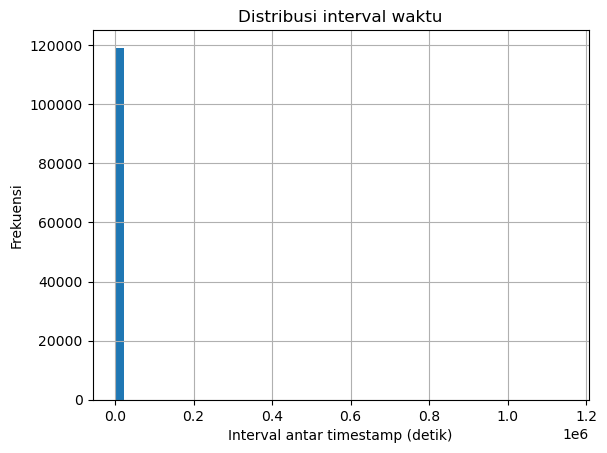

In [21]:
diff_seconds.hist(bins=50)
plt.xlabel("Interval antar timestamp (detik)")
plt.ylabel("Frekuensi")
plt.title("Distribusi interval waktu")
plt.show()

In [22]:
# cek jumlah interval unik
unique_intervals = diff_seconds.unique()
print(f"Unique intervals (in seconds): {unique_intervals[:10]}")


Unique intervals (in seconds): [6.0000e+01 1.8600e+03 5.5020e+04 1.8624e+05 5.4000e+02 1.2000e+02
 1.4400e+04 3.6000e+02 4.2000e+02 2.1600e+03]


### Classification Target

pakai per-sequence classification (many-to-one LSTM)
tapi dengan catatan data harus balance, setelah di cek di path struktur data nya, data untul label tidak balance, report terakhir nya terlampir, normal di atas 90 persen, recovering 2,5 persen, dan error nya 0.0004 persen, sangat jauh jangkauan normal dengan error.

fix yang akan di lakukan kedepan nya :

1. balancing data
2. data recover dan broken mungkin akan di jadikan satu label
3. bisa menggunakan teknik oversampling
4. pakai cross validation

## **Mengecek Missing Value & Data Quality**

### **checking missing gap**

Time series sering punya:

* Missing di tengah (karena sensor off)
* Gap waktu tidak konsisten
* Timestamp duplikat

Hal yang dicek:

* Jumlah missing per kolom
* Timestamp out of order
* Interval waktu tidak konsisten

In [27]:
df_sensor = df_sensor.sort_values("timestamp")
df_sensor.head(10)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL
9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,15.61777,...,41.66666,39.062500,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL


In [28]:
# hitung selesih antar timestamp
df_sensor["delta"] = df_sensor["timestamp"].diff()

# cek distribusi jarak waktu nya
df_sensor["delta"].value_counts().head(10)

delta
0 days 00:01:00    119068
0 days 00:02:00        13
0 days 00:03:00         3
0 days 00:06:00         2
0 days 00:09:00         2
0 days 15:17:00         1
0 days 00:31:00         1
0 days 04:00:00         1
0 days 00:07:00         1
0 days 00:36:00         1
Name: count, dtype: int64

In [29]:
df_sensor = df_sensor.set_index('timestamp')

# Reindex ke setiap menit (sesuai resolusi data kamu)
df_sensor = df_sensor.resample('1T').asfreq()

# Cek berapa banyak missing
missing_ratio = df_sensor.isna().mean().mean()
print(f"Missing ratio: {missing_ratio:.2%}")

Missing ratio: 16.90%


/tmp/ipykernel_6313/3229952681.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_sensor = df_sensor.resample('1T').asfreq()


In [31]:
# Isi nilai sensor yang hilang (pilihan umum: forward fill)
df_sensor = df_sensor.ffill()

In [32]:
# Cek berapa banyak missing
missing_ratio = df_sensor.isna().mean().mean()
print(f"Missing ratio: {missing_ratio:.2%}")

Missing ratio: 0.00%


<Axes: xlabel='timestamp'>

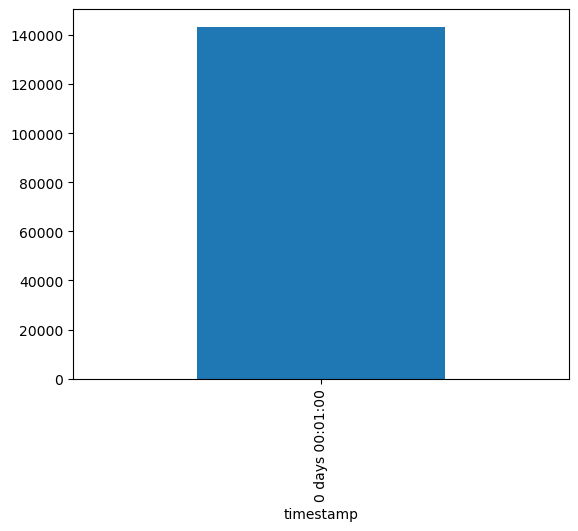

In [33]:
df_sensor.index.to_series().diff().value_counts().plot(kind='bar')
